# Name- Abhinav Kumar

# PRN- 21070126006

# Branch- AIML_A1

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor

### Loading dataset

In [2]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [3]:
abalone.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

In [4]:
abalone.shape

(4177, 9)

In [5]:
abalone.head(25)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### Finding the correlation which will also help in Feature Selection

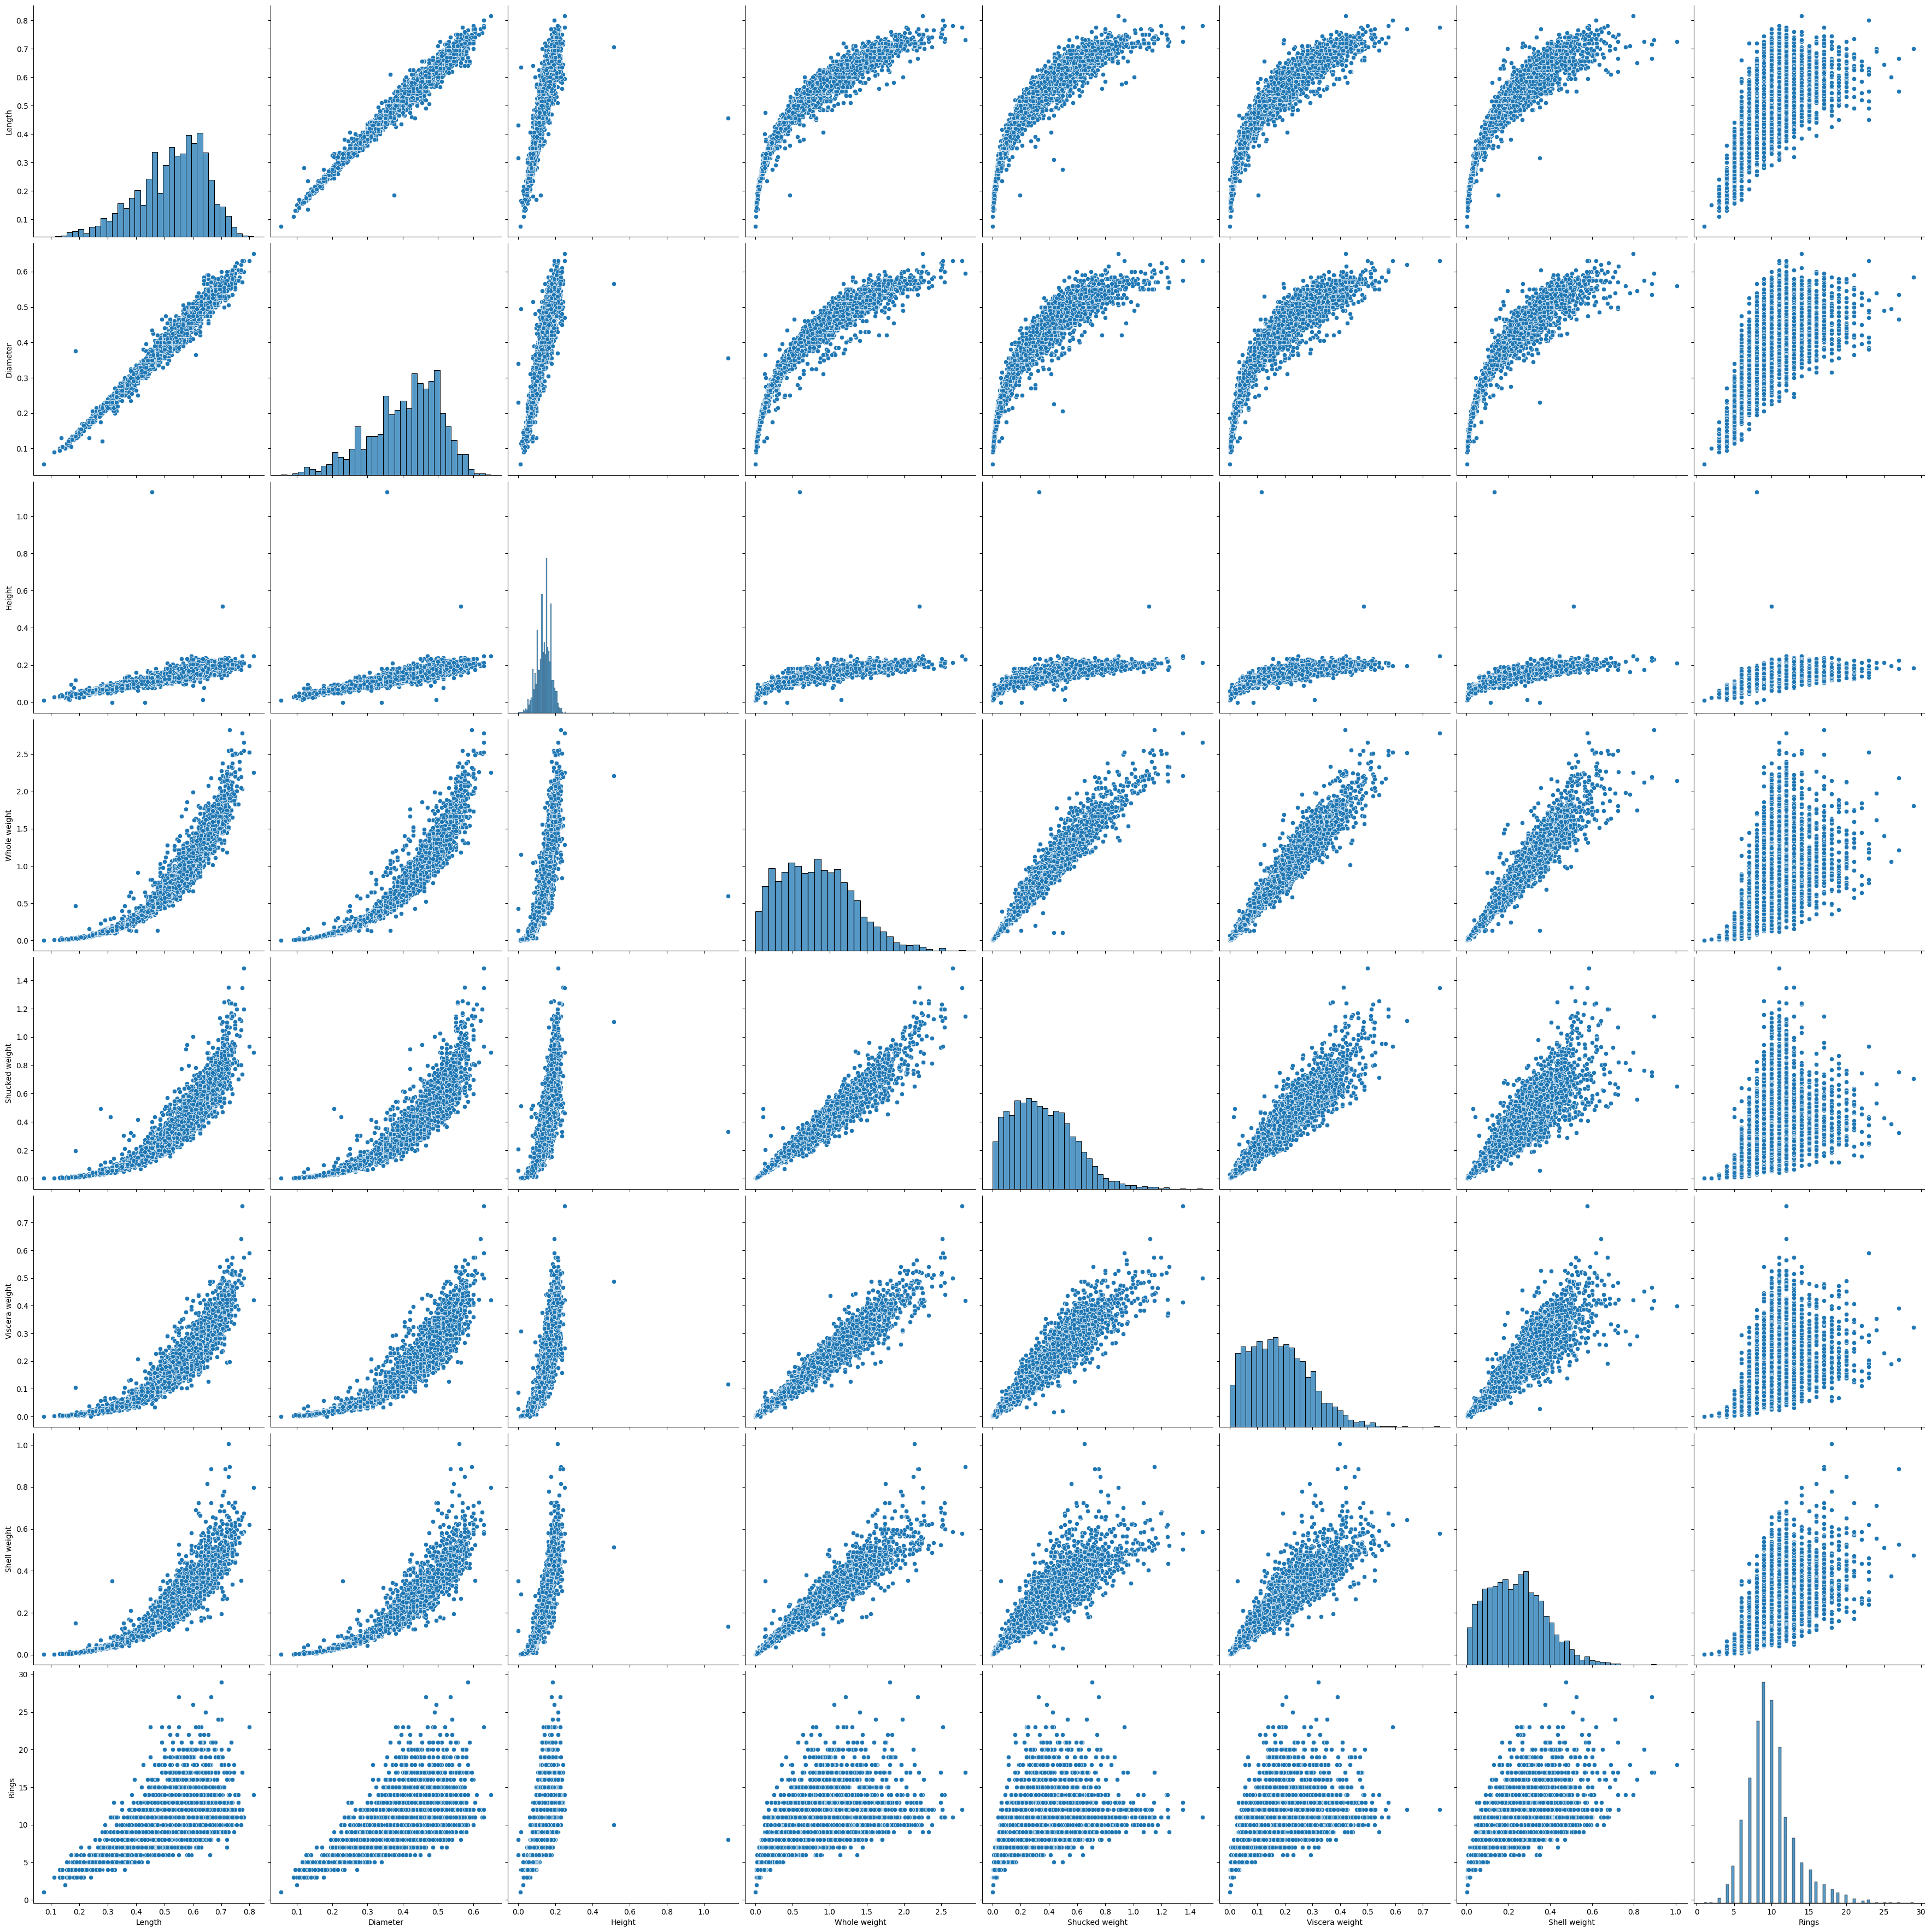

In [7]:
sns.pairplot(abalone, height=4.5)

# Encoding

In [8]:
abalone.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [9]:
abalone.Sex = abalone.Sex.map({'M':0, 'F':1, 'I':2})

In [10]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [11]:
abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot: >

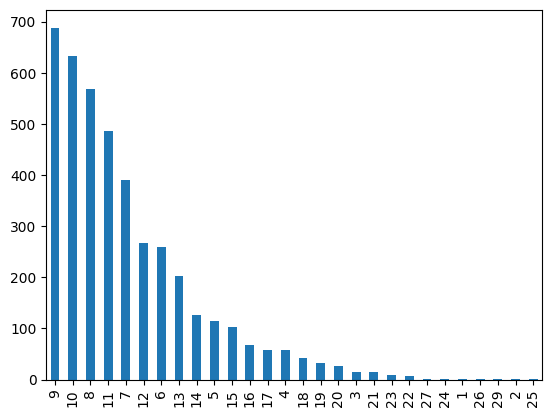

In [12]:
abalone['Rings'].value_counts().plot(kind='bar')

In [13]:
abalone.corr()['Rings'].sort_values()

Sex              -0.351822
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [14]:
abalone = abalone.drop(["Sex", "Shucked weight"], axis=1)

## Test train split

In [15]:
X = abalone.drop('Rings', axis=1).values
y = abalone['Rings'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Applying KNN classifier and tuning the hyperparameter with grid search cv

In [16]:
knn_model = KNeighborsRegressor()

parameters = {"n_neighbors": range(2, 40),
              "weights": ["uniform", "distance"]}

gridsearch_knn = GridSearchCV(KNeighborsRegressor(), parameters, cv=10)
gridsearch_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [17]:
gridsearch_knn.best_params_

{'n_neighbors': 21, 'weights': 'distance'}

In [18]:
best_k = gridsearch_knn.best_params_["n_neighbors"]
best_weights = gridsearch_knn.best_params_["weights"]

bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [19]:
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=21,
                                                    weights='distance'),
                 n_estimators=100)

In [33]:
test_preds_bagg = bagging_model.predict(X_test)


## This is the X test value

In [31]:
X_test

array([[0.605 , 0.455 , 0.16  , 1.1035, 0.3015, 0.325 ],
       [0.59  , 0.44  , 0.15  , 0.8725, 0.215 , 0.245 ],
       [0.56  , 0.445 , 0.195 , 0.981 , 0.2245, 0.335 ],
       ...,
       [0.545 , 0.43  , 0.15  , 0.742 , 0.158 , 0.208 ],
       [0.465 , 0.355 , 0.12  , 0.5805, 0.0915, 0.184 ],
       [0.365 , 0.275 , 0.085 , 0.223 , 0.0375, 0.075 ]])

### And this is the corresponding predicted Y for the above X test values

In [32]:
test_preds_bagg

array([11.15778381,  9.11476963, 13.81189907, 11.44957704, 12.24413035,
        8.71582781,  9.0729062 ,  9.07170751,  6.61835059,  9.96529557,
       10.19589882,  7.5013458 , 11.09233025,  8.291225  ,  8.59292423,
       13.00389387, 11.60195338,  8.45756214, 13.71083477,  8.26639408,
       15.43183988, 11.31694448, 10.66193088, 10.83177815,  9.39323997,
        9.31591134,  9.33510042,  7.92654858,  9.52337503, 13.71374748,
       12.34739994, 11.29334642,  6.61527735, 12.26981994,  9.31699609,
        9.25146187,  6.5755935 ,  3.5921522 ,  8.84834077,  7.05570334,
       12.05001623, 16.09293522,  9.89487312,  9.29033683, 10.00343997,
       11.57508691,  9.76567742,  9.69552292, 12.14697477,  4.21843383,
        6.77715811, 14.33435333,  9.32452985,  4.09838291,  6.74718217,
       10.7564888 , 11.36508566, 12.41675932, 10.48745831,  7.57777995,
       11.92512877, 12.26761237, 10.26543122,  7.27578305,  7.94928811,
       10.59117105,  4.75527046,  6.55786005,  8.63261883, 10.86

## Evaluating

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, test_preds_bagg))
rmse

2.3775285742125303